In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import approx_series as dvn_aps
import scipy.integrate as integrate

## 1. Reimann integration

$$ \int_{a}^{b} f(t) dt \approx \sum_{k=1}^n \left[ \dfrac{ f\left( c_k \right) - f\left(c_{k-1} \right) }{2} \times \left( c_k - c_{k-1} \right) \right]$$

where 

$$ \left \lbrace \begin{array}{ccl} c_0 &=& a \\ c_1 &=& a + \dfrac{b-a}{n} \\ \ldots \\ c_n &=& b \end{array} \right. $$

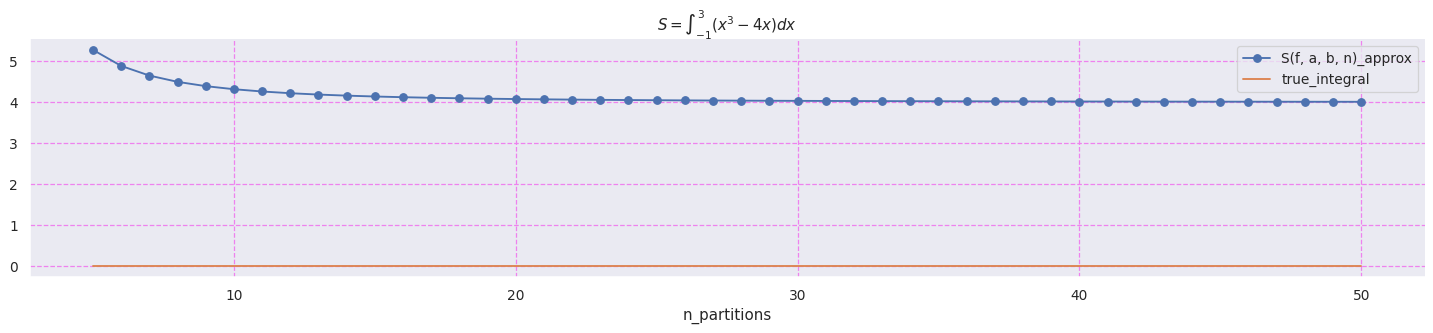

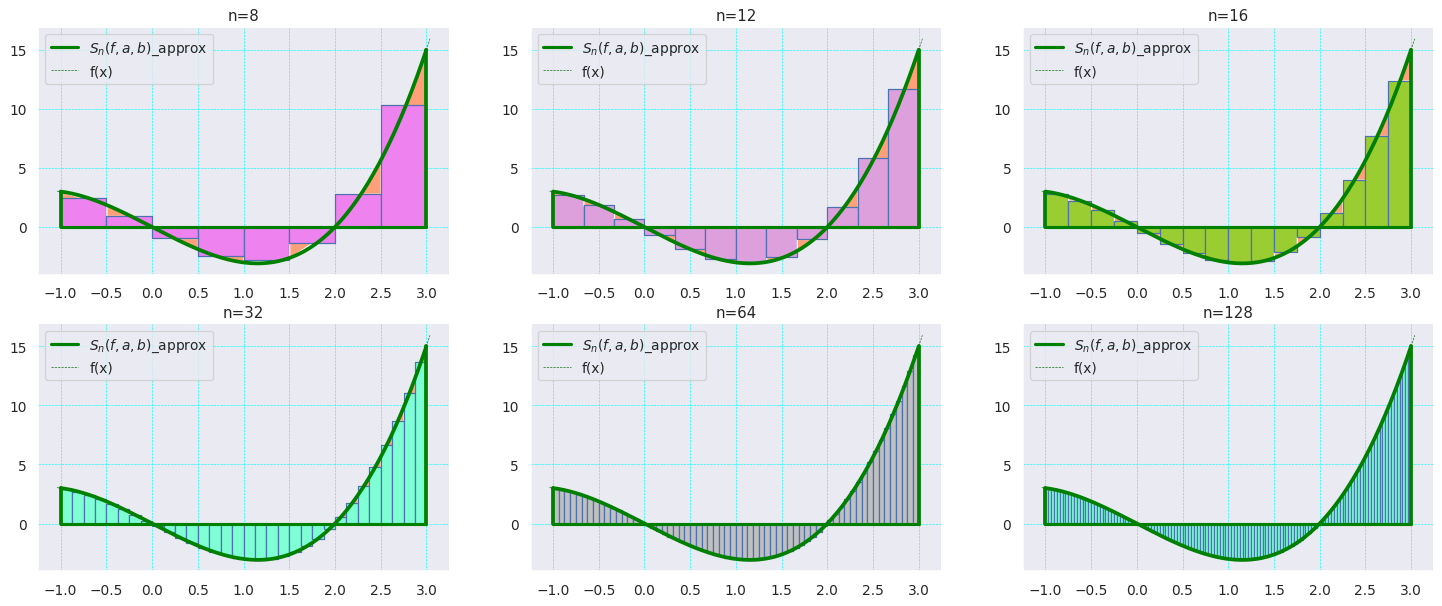

In [2]:
a = -1
b = 3

def fx(x): return (x**3 - 4*x)
    
dvn_aps.loss_integral_Riemann_sum(fx,a, b, 5, 50, '$S = \int_{-1}^3 (x^3-4x)dx$')    
colors = ["violet", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

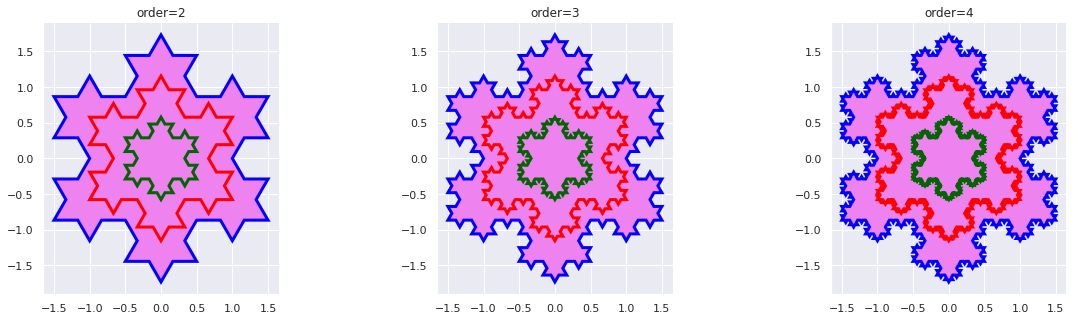

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5),
                             subplot_kw={'aspect': 'equal'})
ax = ax.ravel()
for k, n_od in enumerate([2,3,4]):
    for n, clr in list(zip([2,3,4], ['blue', "red", "darkgreen"])):
        x, y = dvn_aps.koch_snowflake(order=n_od, scale=5-n)
        ax[k].fill(x, y, facecolor='violet', edgecolor=clr, linewidth=3)
        ax[k].set_title("order={}".format(n_od))

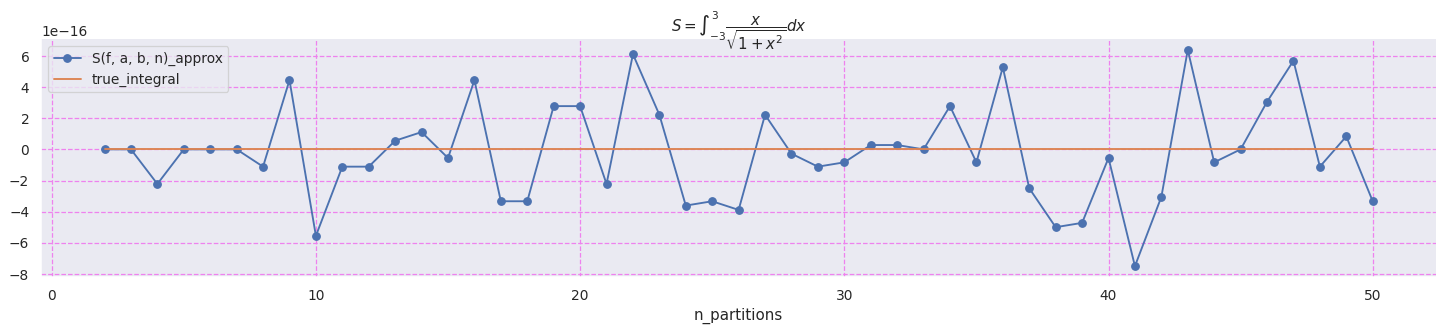

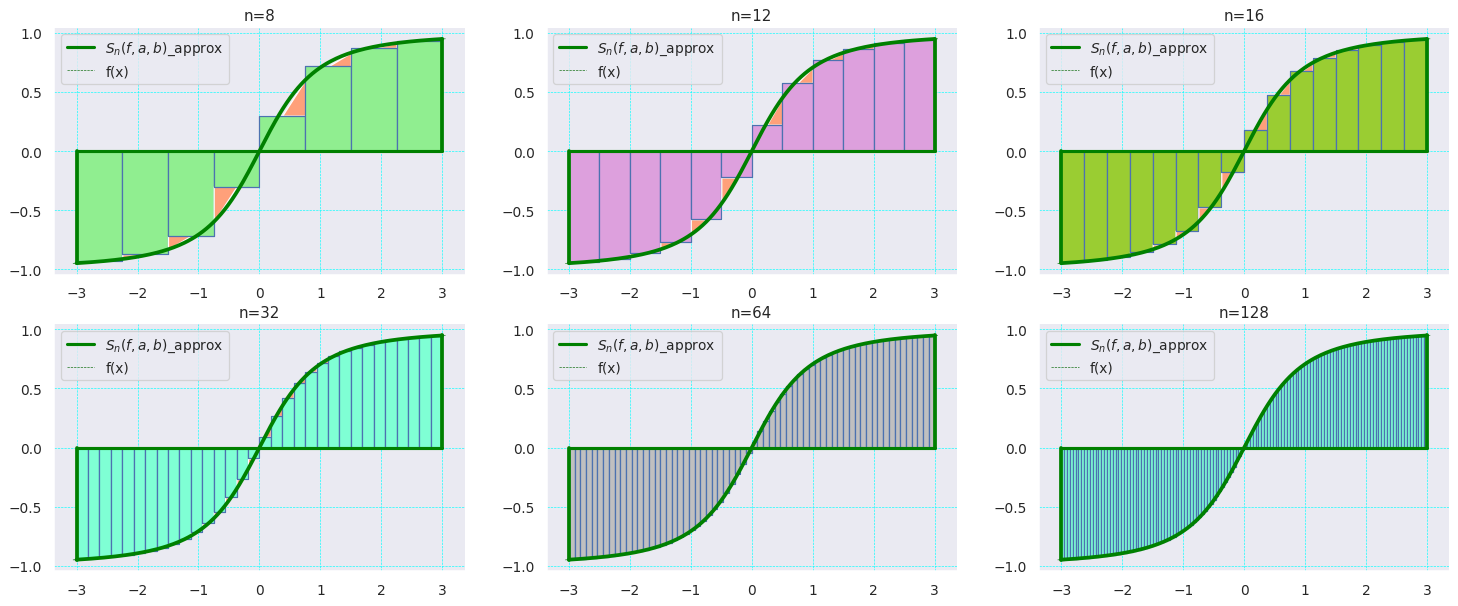

In [10]:
a = -3
b = 3

def fx(x): return x/np.sqrt(1+x**2)

dvn_aps.loss_integral_Riemann_sum(fx,a, b, 2, 50, '$S = \int_{-3}^3 \dfrac{x}{\sqrt{1+x^2}} dx$')    
colors = ["lightgreen", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

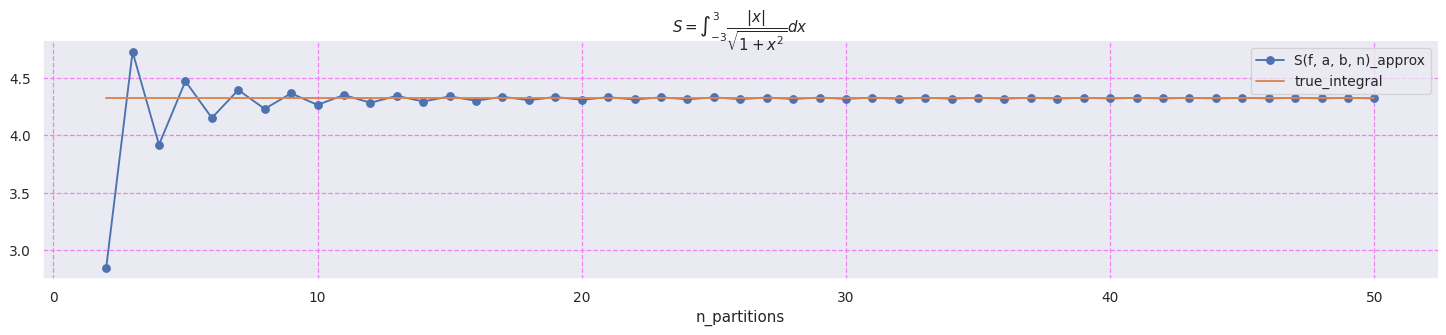

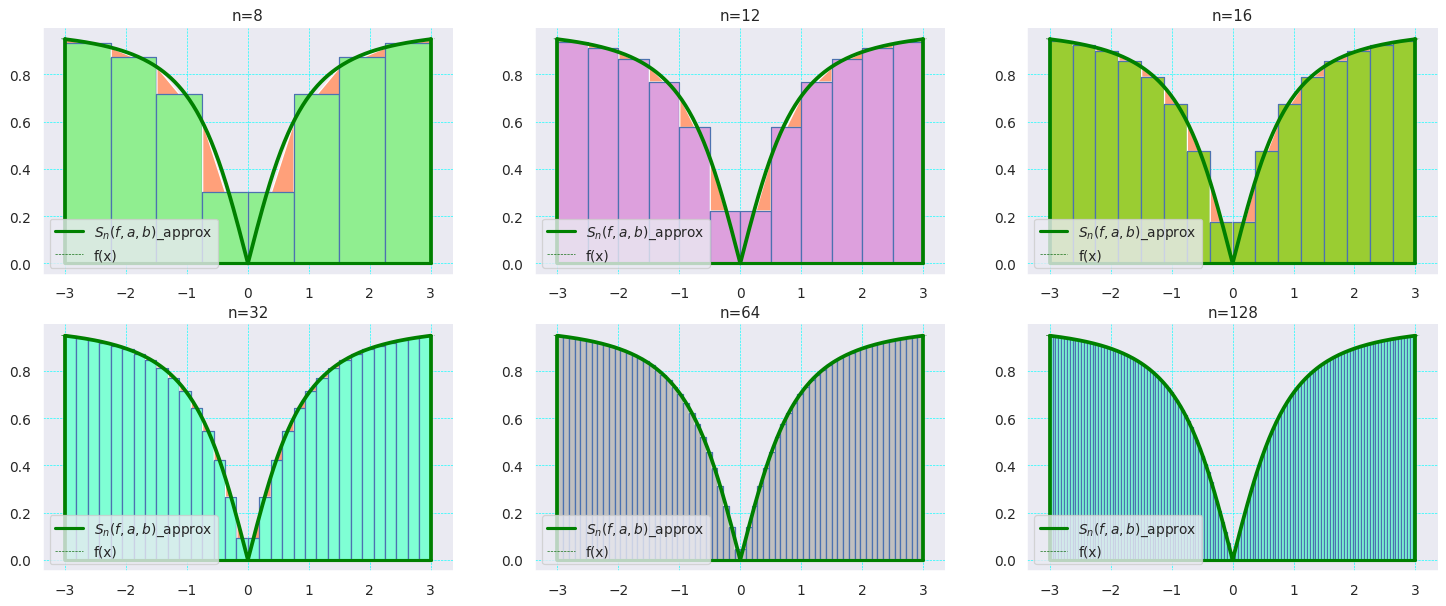

In [12]:
a = -3
b = 3

def fx(x): return abs(x)/np.sqrt(1+x**2)

dvn_aps.loss_integral_Riemann_sum(fx,a, b, 2, 50, '$S = \int_{-3}^3 \dfrac{|x|}{\sqrt{1+x^2}} dx$')    
colors = ["lightgreen", "#DDA0DD", "#9ACD32", "#7FFFD4", "#C0C0C0","#7FFFD4"]    
n_deg = [8, 12, 16, 32, 64, 128]    

fig, ax = plt.subplots(2,3, figsize=(20, 8), dpi=90)
ax = ax.ravel()

for k, (deg, clr) in enumerate(list(zip(n_deg, colors))):    
    dvn_aps.integral_plot(fx, a, b, deg, ax = ax[k], S_clr = "lightsalmon", S_apr_clr = clr)

## 2. Legendre approximation
### Legendre polynomial
From 

$$ \dfrac{d}{dx} \left[ (1 - x^2) \dfrac{d}{dx} P_n(x) \right] + n(n+1) P_n(x) = 0 $$
where Pn is a polynomial of degree n.

Hence, we have

        P(0,x) = 1
        P(1,x) = x
        P(n,x) = (2*n-1)/n * x * P(n-1,x) - (n-1)/n * P(n-2,x)

In [17]:
def Legendre_poly(n, x): 
    if(n == 0):
        return 1 # P0 = 1
    elif(n == 1):
        return x # P1 = x
    else:
        return (((2 * n)-1)*x * P(n-1, x)-(n-1)*P(n-2, x))/float(n)

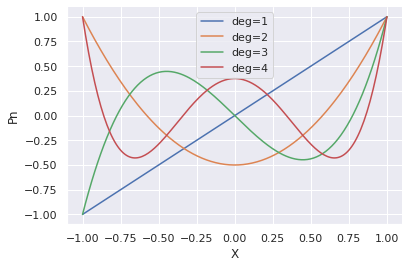

In [18]:
# Creating an array of x values
x = np.linspace(-1, 1, 200) 
  
# for which polynomial values are evaluated and plotted
for i in range(1, 5):
  
    # Labelling according to order
    plt.plot(x, Legendre_poly(i, x), label ="deg={}".format(i)) 
    
plt.legend(loc ="best")
plt.xlabel("X")
plt.ylabel("Pn")
plt.show()

### Gauss-Legendre

In [13]:
import numpy as np

E = np.array([-0.774597, 0.000000, 0.774597])
A = np.array([0.555556, 0.888889, 0.555556])

def gauss(f, a, b, E, A):
    x = np.zeros(3)
    for i in range(3):
        x[i] = (b+a)/2 + (b-a)/2 *E[i]

    return (b-a)/2 * (A[0]*f(x[0]) + A[1]*f(x[1]) + A[2]*f(x[2]))


f = lambda x: 2 + np.sin(x)
a = 0.0; b = np.pi/2

areaGau = gauss(f, a, b, E, A)
print("Gaussian integral: ", areaGau)

Gaussian integral:  4.141602721115907


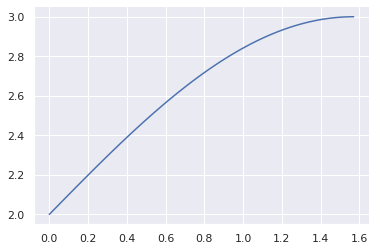

In [14]:
x = np.linspace(a, b, 101)
y = [f(t) for t in x] 
plt.plot(x, y)